# Get Compound Borrows

In [1]:
#import packages
import requests
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import matplotlib.dates as md
import math
import time

In C:\Users\CCCam\Miniconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\CCCam\Miniconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\CCCam\Miniconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\CCCam\Miniconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\CCCam\Miniconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_tes

In [2]:
lastId='""'
start_time = 0
borrow_data=[]
#loop until no more data left
while(1):
    try:
        #set query
        query="""
        {
            borrowEvents (first: 1000 orderBy: id where:{id_gt:"""+lastId+""", blockTime_gt:"""+str(start_time)+"""}) {
            id,
            amount,
            accountBorrows,
            borrower,
            blockNumber,
            underlyingSymbol,
            blockTime
            }
        }
        """
        #make request
        url = 'https://api.thegraph.com/subgraphs/name/graphprotocol/compound-v2'
        request = requests.post(url,json={'query':query})
        #store data
        borrow_data.extend(request.json()['data']['borrowEvents'])
        lastId = "\""+request.json()['data']['borrowEvents'][-1]['id']+"\""
    except Exception as e:
        #exit when no more data left to get
        print(e)
        break

#create borrows data frame
df_borrows = pd.DataFrame(borrow_data)
df_borrows['type']='borrow'
df_borrows.info()

list index out of range
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193070 entries, 0 to 193069
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193070 non-null  object
 1   amount            193070 non-null  object
 2   accountBorrows    193070 non-null  object
 3   borrower          193070 non-null  object
 4   blockNumber       193070 non-null  int64 
 5   underlyingSymbol  193070 non-null  object
 6   blockTime         193070 non-null  int64 
 7   type              193070 non-null  object
dtypes: int64(2), object(6)
memory usage: 11.8+ MB


In [3]:
lastId='""'
start_time = 0
repay_data=[]
#loop until no more data left
while(1):
    try:
        #set query
        query="""
        {
            repayEvents (first: 1000 orderBy: id where:{id_gt:"""+lastId+""", blockTime_gt:"""+str(start_time)+"""}) {
            id,
            amount,
            accountBorrows,
            borrower,
            blockNumber,
            underlyingSymbol,
            blockTime,
            payer
            }
        }
        """
        #make request
        url = 'https://api.thegraph.com/subgraphs/name/graphprotocol/compound-v2'
        request = requests.post(url,json={'query':query})
        #store data
        repay_data.extend(request.json()['data']['repayEvents'])
        lastId = "\""+request.json()['data']['repayEvents'][-1]['id']+"\""
    except Exception as e:
        #exit when no more data left to get
        print(e)
        break

#create borrows data frame
df_repays= pd.DataFrame(repay_data)
df_repays['type']='repay'
df_repays.info()

list index out of range
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155784 entries, 0 to 155783
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                155784 non-null  object
 1   amount            155784 non-null  object
 2   accountBorrows    155784 non-null  object
 3   borrower          155784 non-null  object
 4   blockNumber       155784 non-null  int64 
 5   underlyingSymbol  155784 non-null  object
 6   blockTime         155784 non-null  int64 
 7   payer             155784 non-null  object
 8   type              155784 non-null  object
dtypes: int64(2), object(7)
memory usage: 10.7+ MB


In [4]:
lastId='""'
start_time = 0
transfer_data=[]
#loop until no more data left
while(1):
    try:
        #set query
        query="""
        {
            transferEvents (first: 1000 orderBy: id where:{id_gt:"""+lastId+""", blockTime_gt:"""+str(start_time)+"""}) {
            id,
            amount,
            to,
            from,
            blockNumber,
            blockTime,
            cTokenSymbol
            }
        }
        """
        #make request
        url = 'https://api.thegraph.com/subgraphs/name/graphprotocol/compound-v2'
        request = requests.post(url,json={'query':query})
        #store data
        transfer_data.extend(request.json()['data']['transferEvents'])
        lastId = "\""+request.json()['data']['transferEvents'][-1]['id']+"\""
    except Exception as e:
        #exit when no more data left to get
        print(e)
        break

#create borrows data frame
df_transfer= pd.DataFrame(transfer_data)
df_transfer['type']='transfer'
df_transfer.info()

list index out of range
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1539193 entries, 0 to 1539192
Data columns (total 8 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   id            1539193 non-null  object
 1   amount        1539193 non-null  object
 2   to            1539193 non-null  object
 3   from          1539193 non-null  object
 4   blockNumber   1539193 non-null  int64 
 5   blockTime     1539193 non-null  int64 
 6   cTokenSymbol  1539193 non-null  object
 7   type          1539193 non-null  object
dtypes: int64(2), object(6)
memory usage: 93.9+ MB


In [5]:
lastId='""'
start_time = 0
redeem_data=[]
#loop until no more data left
while(1):
    try:
        #set query
        query="""
        {
            redeemEvents (first: 1000 orderBy: id where:{id_gt:"""+lastId+""", blockTime_gt:"""+str(start_time)+"""}) {
            id,
            amount,
            to,
            from,
            blockNumber,
            blockTime,
            cTokenSymbol,
            underlyingAmount
            }
        }
        """
        #make request
        url = 'https://api.thegraph.com/subgraphs/name/graphprotocol/compound-v2'
        request = requests.post(url,json={'query':query})
        #store data
        redeem_data.extend(request.json()['data']['redeemEvents'])
        lastId = "\""+request.json()['data']['redeemEvents'][-1]['id']+"\""
    except Exception as e:
        #exit when no more data left to get
        print(e)
        break

#create borrows data frame
df_redeem= pd.DataFrame(redeem_data)
df_redeem['type']='redeem'
df_redeem.info()

list index out of range
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434721 entries, 0 to 434720
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                434721 non-null  object
 1   amount            434721 non-null  object
 2   to                434721 non-null  object
 3   from              434721 non-null  object
 4   blockNumber       434721 non-null  int64 
 5   blockTime         434721 non-null  int64 
 6   cTokenSymbol      434721 non-null  object
 7   underlyingAmount  434721 non-null  object
 8   type              434721 non-null  object
dtypes: int64(2), object(7)
memory usage: 29.9+ MB


In [6]:
lastId='""'
start_time = 0
liquidation_data=[]
#loop until no more data left
while(1):
    try:
        #set query
        query="""
        {
            liquidationEvents (first: 1000 orderBy: id where:{id_gt:"""+lastId+""", blockTime_gt:"""+str(start_time)+"""}) {
            id,
            amount,
            to,
            from,
            blockNumber,
            blockTime,
            cTokenSymbol,
            underlyingSymbol,
            underlyingRepayAmount
            }
        }
        """
        #make request
        url = 'https://api.thegraph.com/subgraphs/name/graphprotocol/compound-v2'
        request = requests.post(url,json={'query':query})
        #store data
        liquidation_data.extend(request.json()['data']['liquidationEvents'])
        lastId = "\""+request.json()['data']['liquidationEvents'][-1]['id']+"\""
    except Exception as e:
        #exit when no more data left to get
        print(e)
        break

#create borrows data frame
df_liquidation= pd.DataFrame(liquidation_data)
df_liquidation['type']='liquidation'
df_liquidation.info()

list index out of range
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11126 entries, 0 to 11125
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     11126 non-null  object
 1   amount                 11126 non-null  object
 2   to                     11126 non-null  object
 3   from                   11126 non-null  object
 4   blockNumber            11126 non-null  int64 
 5   blockTime              11126 non-null  int64 
 6   cTokenSymbol           11126 non-null  object
 7   underlyingSymbol       11126 non-null  object
 8   underlyingRepayAmount  11126 non-null  object
 9   type                   11126 non-null  object
dtypes: int64(2), object(8)
memory usage: 869.3+ KB


In [12]:
df = df_borrows.append(df_repays).append(df_transfer).append(df_redeem).append(df_liquidation)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2333894 entries, 0 to 11125
Data columns (total 14 columns):
 #   Column                 Dtype 
---  ------                 ----- 
 0   id                     object
 1   amount                 object
 2   accountBorrows         object
 3   borrower               object
 4   blockNumber            int64 
 5   underlyingSymbol       object
 6   blockTime              int64 
 7   type                   object
 8   payer                  object
 9   to                     object
 10  from                   object
 11  cTokenSymbol           object
 12  underlyingAmount       object
 13  underlyingRepayAmount  object
dtypes: int64(2), object(12)
memory usage: 267.1+ MB


In [29]:
df.to_csv('compoundTransactions.csv')

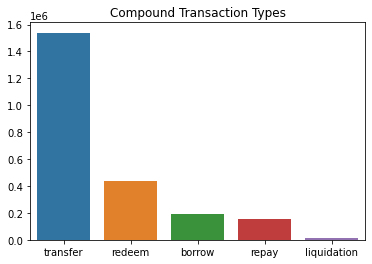

In [20]:
plt.title('Compound Transaction Types')
sns.barplot(x=df['type'].value_counts().index,y=df['type'].value_counts().values)
plt.show()

In [26]:
trans = pd.read_csv('transactions.csv')
trans = trans[~((trans['type']=='collateral')|(trans['type']=='swap'))]
trans.info()

C:\Users\CCCam\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3326: DtypeWarning: Columns (2,3,13,14,16,26,27,28,29,30,33,34,40,41) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 667929 entries, 0 to 667928
Data columns (total 42 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   amount                        656882 non-null  float64
 1   borrowRate                    131207 non-null  float64
 2   borrowRateMode                131207 non-null  object 
 3   onBehalfOf                    656882 non-null  object 
 4   pool                          667929 non-null  object 
 5   reserve                       656882 non-null  object 
 6   timestamp                     667929 non-null  int64  
 7   user                          667929 non-null  object 
 8   type                          667929 non-null  object 
 9   reservePriceETH               656882 non-null  float64
 10  reservePriceUSD               656882 non-null  float64
 11  amountETH                     656882 non-null  float64
 12  amountUSD                     656882 non-nul

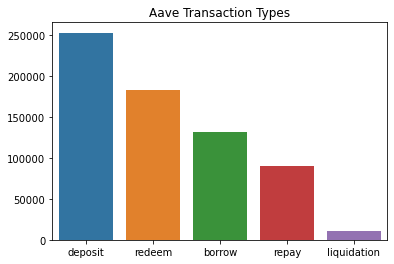

In [28]:
plt.title('Aave Transaction Types')
sns.barplot(x=trans['type'].value_counts().index,y=trans['type'].value_counts().values)
plt.show()

In [31]:
trans['amount'].describe()

count    6.568820e+05
mean     3.506038e+05
std      7.388677e+06
min      1.000000e-18
25%      2.502250e+01
50%      1.795119e+03
75%      3.000000e+04
max      6.000000e+08
Name: amount, dtype: float64

In [35]:
df['amount'].astype(float).describe()

count    2.333894e+06
mean     8.944347e+06
std      2.526844e+08
min      0.000000e+00
25%      1.411412e+02
50%      2.504748e+03
75%      6.834193e+04
max      2.306370e+10
Name: amount, dtype: float64